# LSD profiles

This notebook contains exercises to understand the concept of LSD profiles

## 0. Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u

## 1. Simple toy code to illustrate the concept of an observed spectrum being a convolution of a line mask and a profile shape

The LSD method relies on the approximation that the shape of spectral lines all have similar shapes, that are scaled by a factor called the *weigth* (a depth for intensity line profiles, and depth x wavelength x lande factor for Stokes V)

In this case, we can therefore think of a star's spectrum as being the convolution of a *mask* $M$ function with delta diracs at the position of each spectral lines (with a value corresponding the weigth of the spectral lines) and a profile shape $Z$ (the LSD profile).

In the first activity below, we illustrate this convolution process. We use a simple skewed triangular shape for the $Z$ profile. The mask function is 25 units long, and has a delta dirac at positions 1, 6, and 16. 

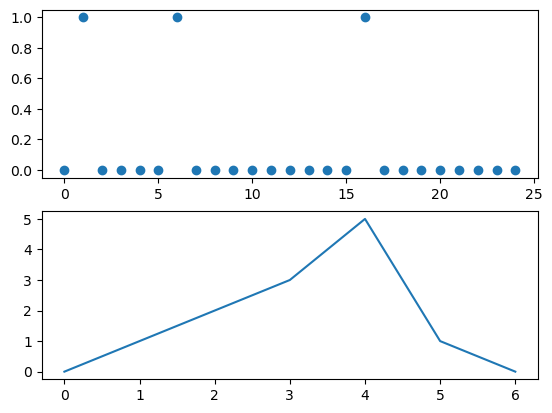

In [3]:
Z = np.array([0, 1, 2, 3, 5, 1, 0])
lines = [1, 6, 16]
nM = 25
M = np.zeros(nM)
M[lines]=1

fig, ax = plt.subplots(2,1)
ax[0].scatter(np.arange(0,M.size,1),M)
ax[1].plot(Z)

a. In the cell below, create your own function to calculate a convolution

b. Now in the cell below, calculate and graph the convolution between $M$ and $Z$

## 2. Matrix version of a convolution

We can also write a convolution as being the dot product between a matrix representation of the mask and the profile shape

a. In the cell below, you can see that I have already created an empty matrix for the Mask array (`M_mat`). Now fill in the associated diagonals with ones. Print you matrix to make sure it is correct

Hint: As we saw in class, we can use a padded version of the `M` array to create a loop that assigns a slice of this array shifted according to the loop index. 

In [4]:
Z = np.array([0, 1, 2, 3, 5, 1, 0])
lines = [1, 6, 16]
nM = 25
M = np.zeros(nM)
M[lines]=1

# create a matrix filled with zeros for M
M_mat = np.zeros((nM, Z.size))



b. Now let's make the convolution by taking the dot product of $\bar{M}$ and $\vec{Z}$. Make a graph of the result

## 3. Inversion of the simple toy model

In the previous section, we have seen that $\vec{V}=\bar{M}\cdot\vec{Z}$. We can now 'invert' this problem, aka find the least square fit to this system of equation. 

$$\vec{Z}_\mathrm{min} = (\bar{M}^T\bar{M})^{-1} \bar{M}^T\vec{V}$$

b. Just for fun, let's check what this would look like if we were to add some noise to the data array

## 4. A more realistic example

Let look at a case where the observed spectrum has been measured with an even spacing in wavelength. 

For example, let's say that this spacing is an even 0.003 nm. 

If you have a spectral line that has a broadening of 100 km/s, what will be (i) width of the line profile in nm and (ii) the number of data points inside the line profile if the spectral line is located at
a) 300 nm
b) 800 nm

Use astropy units and constant packages. 

> Solution:
>
> 

In [5]:
spectra_dispersion = 0.003*u.nm


## Solution



As you can see from the exercise above, we have a mismatch in units and dispersion (i.e. grid spacing) between the observed spectrum $\vec{V}$ and the mask $\vec{M}$.

In the cell below, I created for you a fake observation with 4 spectral lines. The broadening of each line is 20 km/s, and I use a Gaussian line profile, for simplicity.

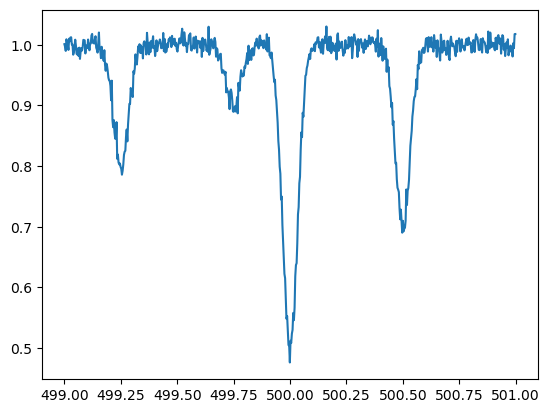

In [6]:
delta_v = 2.0 * u.km/u.s # desired dispersion for the LSD profile (typical value for good resolution data)
delta_lambda = 0.003 * u.nm # grid spacing of the observed spectrum (similar to espadons)
vbroad = 20 * u.km/u.s # broadened width of spectral lines

# create an array of wavelenght for the observation
wave = np.arange(499, 501, delta_lambda.value)*u.nm

# add a spectral line
lambda0 = 500 * u.nm # line
lambda1 = 499.25 * u.nm
lambda2 = 499.75 * u.nm
lambda3 = 500.5 * u.nm # line

flux = 1.0- (
        0.5*np.exp((-0.5*(wave-lambda0)**2/(vbroad/const.c*lambda0)**2).decompose())
        + 0.2*np.exp((-0.5*(wave-lambda1)**2/(vbroad/const.c*lambda1)**2).decompose())
        + 0.1*np.exp((-0.5*(wave-lambda2)**2/(vbroad/const.c*lambda2)**2).decompose()) 
        + 0.3*np.exp((-0.5*(wave-lambda3)**2/(vbroad/const.c*lambda3)**2).decompose()) 
        )

# add a bit of noise
snr = 100
sigma = 1/snr
flux = flux + np.random.normal(0, sigma, flux.size)

# plot the fake spectrum
fig, ax = plt.subplots(1,1)
ax.plot(wave, flux)

Now, we need to construct the $\bar{M}$ 

(see lecture slides)

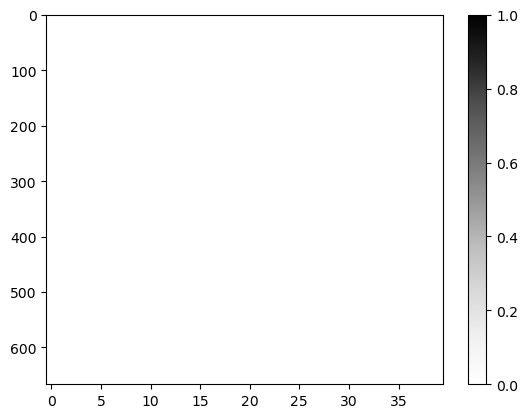

In [7]:
vel_Z = 5 * u.km/u.s
vel = np.arange(-100,100,vel_Z.value) * u.km/u.s

M = np.zeros((wave.size, vel.size))

lines = [lambda0, lambda1, lambda2, lambda3]
wline = [0.5, 0.2, 0.1, 0.3]


# Solution:





######
fig, ax = plt.subplots(1,1)
im = ax.imshow(M, interpolation='none', aspect='auto', cmap='Greys', vmin=0.0, vmax=1.0)
plt.colorbar(im)

Now that we have $\bar{M}$, we can calculate the LSD profile. 

The solution of this least-square problem is:

$$\vec{Z} =  (\bar{M}^T \bar{S}^2 \bar{M})^{-1} (\bar{M}^T \bar{S}^2 \vec{V}), $$

where $\bar{S}$ is a diagonal matrix with the error bars for each datapoint in the spectrum (already defined in the code below -- just using a constant error bar for the whole fake spectrum)

The first term is the inverse of an auto-correlation matrix, and the second term is a cross-correlation.

In the cell below, calculate $\vec{Z}$ and make a graph

In [ ]:
# Solution

Now that we have our LSD profile, we can reconstruct what the predicted spectrum would look like by simply taking the dot product between Z and the mask matrix. 

In the cell below, the fake spectrum is already plotted. Calculate the model spectrum predicted by LSD and overplot

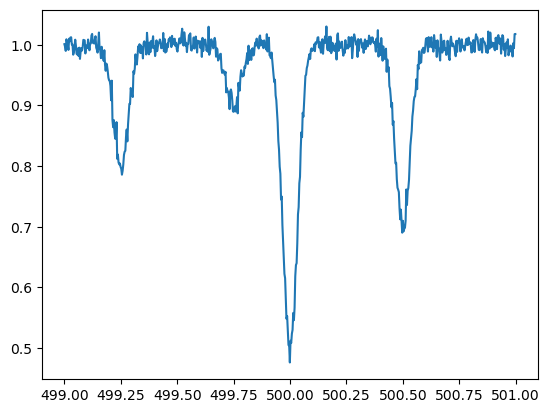

In [8]:
fig, ax = plt.subplots(1,1)
ax.plot(wave, flux)

# Solution

